# 이미지 변환

## 동차좌표와 어파인 변환

앞으로 설명할 이미지의 변환에 관한 수식을 이해하기 위해서는 동차좌표(Homogenous Coordinate)의 개념을 먼저 알아두어야 한다. 동차좌표는 2차원상의 점의 위치를 2차원 벡터가 아닌 3차원 벡터로 표현하는 방법이다. 다음과 같이 마지막 원소로 1을 추가하고 만든다

In [1]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./recipt.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(img, cmap=plt.cm.gray)
plt.grid(False)
plt.show()

<Figure size 1000x1000 with 1 Axes>

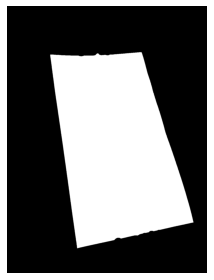

In [2]:
img = cv2.imread('./recipt.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = 200
maxval = 10
_, img_2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
img_2 = cv2.medianBlur(img_2,3)
img_result = cv2.morphologyEx(img_2,cv2.MORPH_CLOSE,
                           cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40,40))
                          )
plt.imshow(img_result, cmap='gray')
plt.axis('off')
plt.tight_layout()

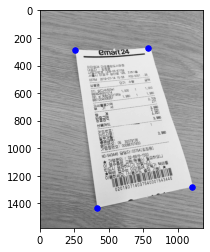

In [3]:
import cv2
contours, hierachy = cv2.findContours(img_result, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
c0 = contours[0]

leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.imshow(img,cmap='gray')
plt.scatter([leftmost[0],rightmost[0],topmost[0],bottommost[0]],
           [leftmost[1],rightmost[1],topmost[1],bottommost[1]],
           c='b',s=30)
plt.show()

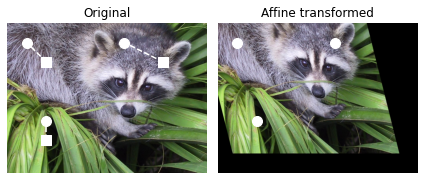

In [4]:
import scipy as sp
import scipy.misc
import numpy as np
img = sp.misc.face()
rows, cols, ch = img.shape

pts1 = np.float32([[200, 200], [200, 600], [800, 200]])
pts2 = np.float32([[100, 100], [200, 500], [600, 100]])

pts_x1, pts_y1 = zip(*pts1)
pts_x2, pts_y2 = zip(*pts2)

H_affine = cv2.getAffineTransform(pts1, pts2)
H_affine
img2 = cv2.warpAffine(img, H_affine, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2)

ax1.set_title("Original")
ax1.imshow(img)
ax1.scatter(pts_x1, pts_y1, c='w', s=100, marker="s")
ax1.scatter(pts_x2, pts_y2, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x1, pts_x2), axis=-1))),
         list(zip(*np.stack((pts_y1, pts_y2), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Affine transformed")
ax2.imshow(img2)
ax2.scatter(pts_x2, pts_y2, c='w', s=100)
ax2.axis("off")

plt.tight_layout()
plt.show()

In [5]:
import numpy as np
# pts1 = np.float32([[256,287],[1103,1278],[782,273],[415,1431]])
# pts1 = np.float32([[0,0],[1500,1150],[1100,0],[0,1600]])
pts1 = np.float32([[200, 200], [200, 600], [800, 200], [800, 600]])
pts2 = np.float32([[300, 300], [300, 500], [600, 100], [700, 500]])

H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
H_perspective

array([[-8.43769499e-17, -7.62711864e-02,  2.59322034e+02],
       [-3.38983051e-01,  2.79661017e-01,  2.55932203e+02],
       [-6.77966102e-04, -2.54237288e-04,  1.00000000e+00]])

In [6]:

leftmost,rightmost,topmost,bottommost

((256, 287), (1103, 1278), (782, 273), (415, 1431))

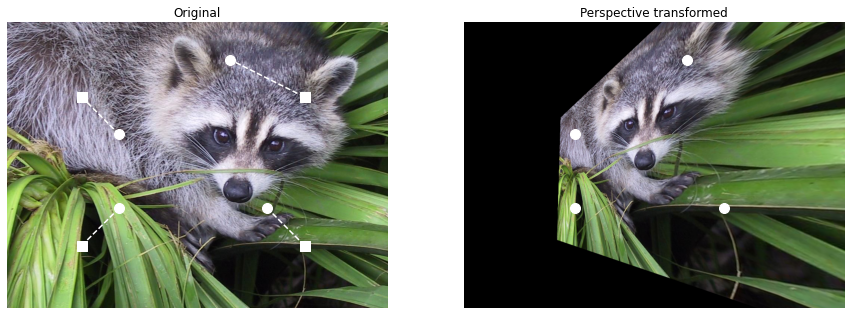

In [7]:
img2 = cv2.warpPerspective(img, H_perspective, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 15))

pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

ax1.set_title("Original")
ax1.imshow(img, cmap=plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker="s")
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")



ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()

In [13]:
img = cv2.imread('./recipt.png')
img.shape

(1578, 1184, 3)

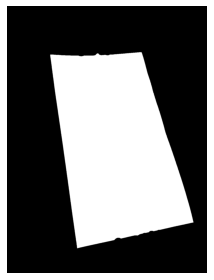

In [14]:
img = cv2.imread('./recipt.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = 200
maxval = 10

#쓰레쉬 홀드
_, img_2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

#미디언 블러
img_2 = cv2.medianBlur(img_2,3)

# 클로징
img_result = cv2.morphologyEx(img_2,cv2.MORPH_CLOSE,
                           cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40,40))
                          )
plt.imshow(img_result, cmap='gray')
plt.axis('off')
plt.tight_layout()

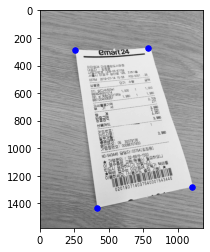

In [15]:
import cv2
contours, hierachy = cv2.findContours(img_result, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
c0 = contours[0]
#포인트만 따오기
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.imshow(img,cmap='gray')

plt.scatter([leftmost[0],rightmost[0],topmost[0],bottommost[0]],
           [leftmost[1],rightmost[1],topmost[1],bottommost[1]],
           c='b',s=30)
plt.show()

In [19]:

rows, cols, ch = img.shape

pts1 = np.float32([[256,287],[1103,1278],[782,273],[415,1431]])
pts2 = np.float32([[0,0],[1184,1578],[1184,0],[0,1578]])

pts_x1, pts_y1 = zip(*pts1)
pts_x2, pts_y2 = zip(*pts2)

H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
H_perspective

array([[ 2.18637179e+00, -3.03875101e-01, -4.72499025e+02],
       [ 5.42734661e-02,  2.03913165e+00, -5.99124792e+02],
       [-1.67023548e-04,  3.86505402e-04,  1.00000000e+00]])

In [33]:
img = cv2.imread('./recipt.png')
img.shape

(1578, 1184, 3)

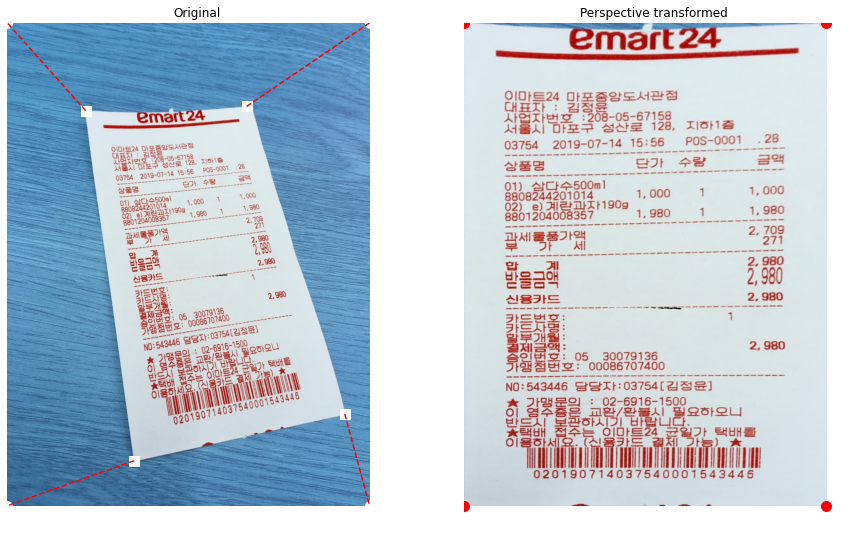

In [36]:
img2 = cv2.warpPerspective(img, H_perspective, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 15))

pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

ax1.set_title("Original")
ax1.imshow(img, cmap=plt.cm.gray)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker="s")
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="r")
ax1.axis("off")



ax2.set_title("Perspective transformed")
ax2.imshow(img2,cmap=plt.cm.gray)
ax2.scatter(pts_x_, pts_y_, c='r', s=100)
ax2.axis("off")

plt.show()